# Modelagem gravimétrica 3D de um prisma poligonal 

**[Referências]**

* Plouff, D. , 1976, Gravity and magnetic fields of polygonal prisms and applications to magnetic terrain corrections, Geophysics, 41(4), 727-741. https://doi.org/10.1190/1.1440645.

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import polyprism_grav 

## Gerando os parâmetros do sistema de coordenadas 

In [3]:
Nx = 500
Ny = 100
area = [-1250.,1250.,-1250.,1250.]
shape = (Nx,Ny)

In [4]:
x = np.linspace(area[0],area[1],num=Nx)
y = np.linspace(area[2],area[3],num=Ny) 
yc,xc = np.meshgrid(y,x)

In [5]:
voo = 0.
zc = voo*np.ones_like(xc)

In [6]:
coordenadas = np.array([yc.ravel(),xc.ravel(),zc.ravel()])

## Gerando os parâmetros do prisma

In [7]:
rho = np.array([500.])

In [8]:
x_verts = [500.,500.,-500.,-500.,500.]
y_verts = [-100.,100.,100.,-100.,-100.]

prism = np.array([y_verts,x_verts])

In [9]:
espessura = np.array([[50.,150.]])

In [10]:
poligono = [prism]

## Cálculo das componentes do campo de gravidade

In [11]:
gz = polyprism_grav.gravitational(coordenadas,poligono,espessura,rho,field="gz")

## Visualização dos dados calculados 

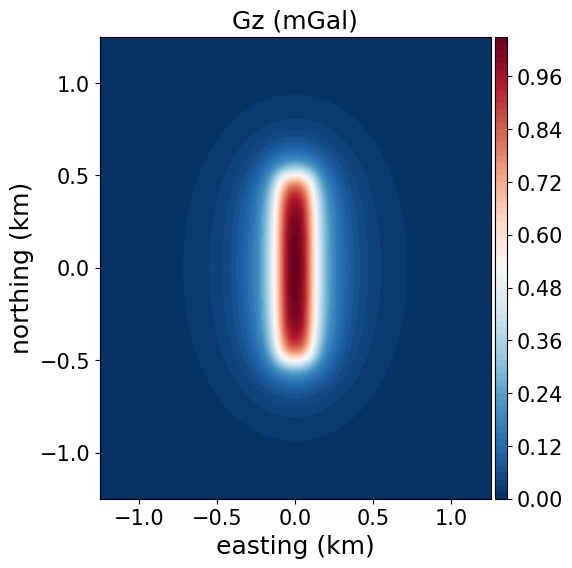

In [12]:
title_font = 18
bottom_font = 15
plt.close('all')
plt.figure(figsize=(6,6))

plt.xlabel('easting (km)', fontsize = title_font)
plt.ylabel('northing (km)', fontsize = title_font)
plt.title('Gz (mGal)', fontsize=title_font)
plt.contourf(1e-3*yc,1e-3*xc,gz.reshape(shape),100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.show()